In [80]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [81]:
# Load the dataset
file_path = 'apple_stock_data.csv'
df = pd.read_csv(file_path)

In [82]:
#Display the first few rows of the dataframe
print(df.head())
print("-------------------------------------------------------------------------------------------------------------")
#Display information about the dataset
print(df.info())
print("-------------------------------------------------------------------------------------------------------------")
#Get summary statistics
print(df.describe())
print("-------------------------------------------------------------------------------------------------------------")

                        Date      Open      High       Low     Close  \
0  1980-12-12 00:00:00-05:00  0.099058  0.099488  0.099058  0.099058   
1  1980-12-15 00:00:00-05:00  0.094321  0.094321  0.093890  0.093890   
2  1980-12-16 00:00:00-05:00  0.087429  0.087429  0.086999  0.086999   
3  1980-12-17 00:00:00-05:00  0.089152  0.089582  0.089152  0.089152   
4  1980-12-18 00:00:00-05:00  0.091737  0.092167  0.091737  0.091737   

      Volume  Dividends  Stock Splits  
0  469033600        0.0           0.0  
1  175884800        0.0           0.0  
2  105728000        0.0           0.0  
3   86441600        0.0           0.0  
4   73449600        0.0           0.0  
-------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10950 entries, 0 to 10949
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1095

In [83]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date')

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Select all the columns
data = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']]


False
-------------------------------------------------------------------------------------------------------------
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
                  Open      High       Low     Close    Volume  Dividends  \
Open          1.000000  0.999949  0.999941  0.999877 -0.252657   0.099074   
High          0.999949  1.000000  0.999927  0.999941 -0.252325   0.098677   
Low           0.999941  0.999927  1.000000  0.999943 -0.253205   0.098911   
Close         0.999877  0.999941  0.999943  1.000000 -0.252780   0.098890   
Volume       -0.252657 -0.252325 -0.253205 -0.252780  1.000000  -0.034981   
Dividends     0.099074  0.098677  0.098911  0.098890 -0.034981   1.000000   
Stock Splits  0.007349  0.007558  0.007320  0.007522  0.001807  -0.001188   

              Stock Splits  
Open              0.007349  
High              0.007558  
Low               0.007320  
Close       

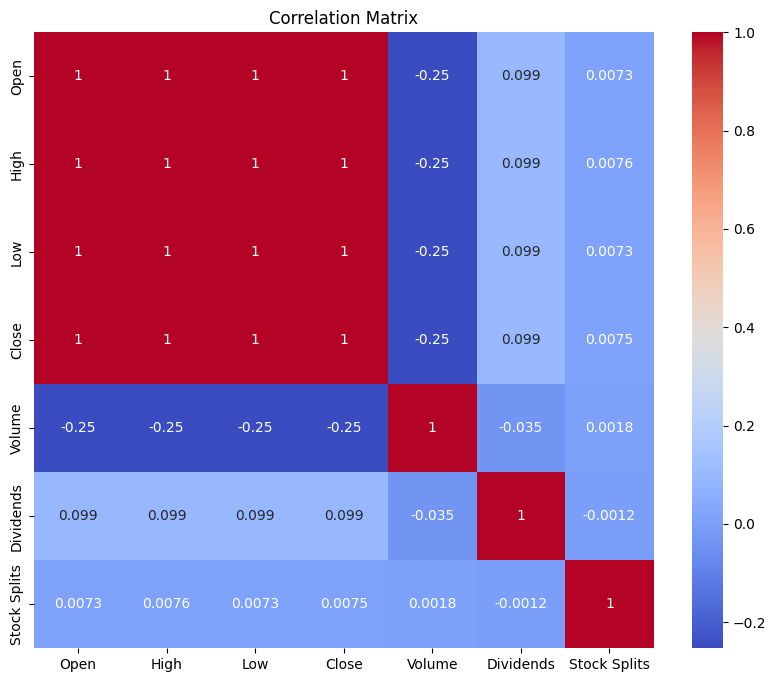

In [84]:
# Check if any value is missing in the entire DataFrame
print(data.isnull().values.any())
print("-------------------------------------------------------------------------------------------------------------")
# Check for missing values in each column
print(data.isnull().sum())


# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

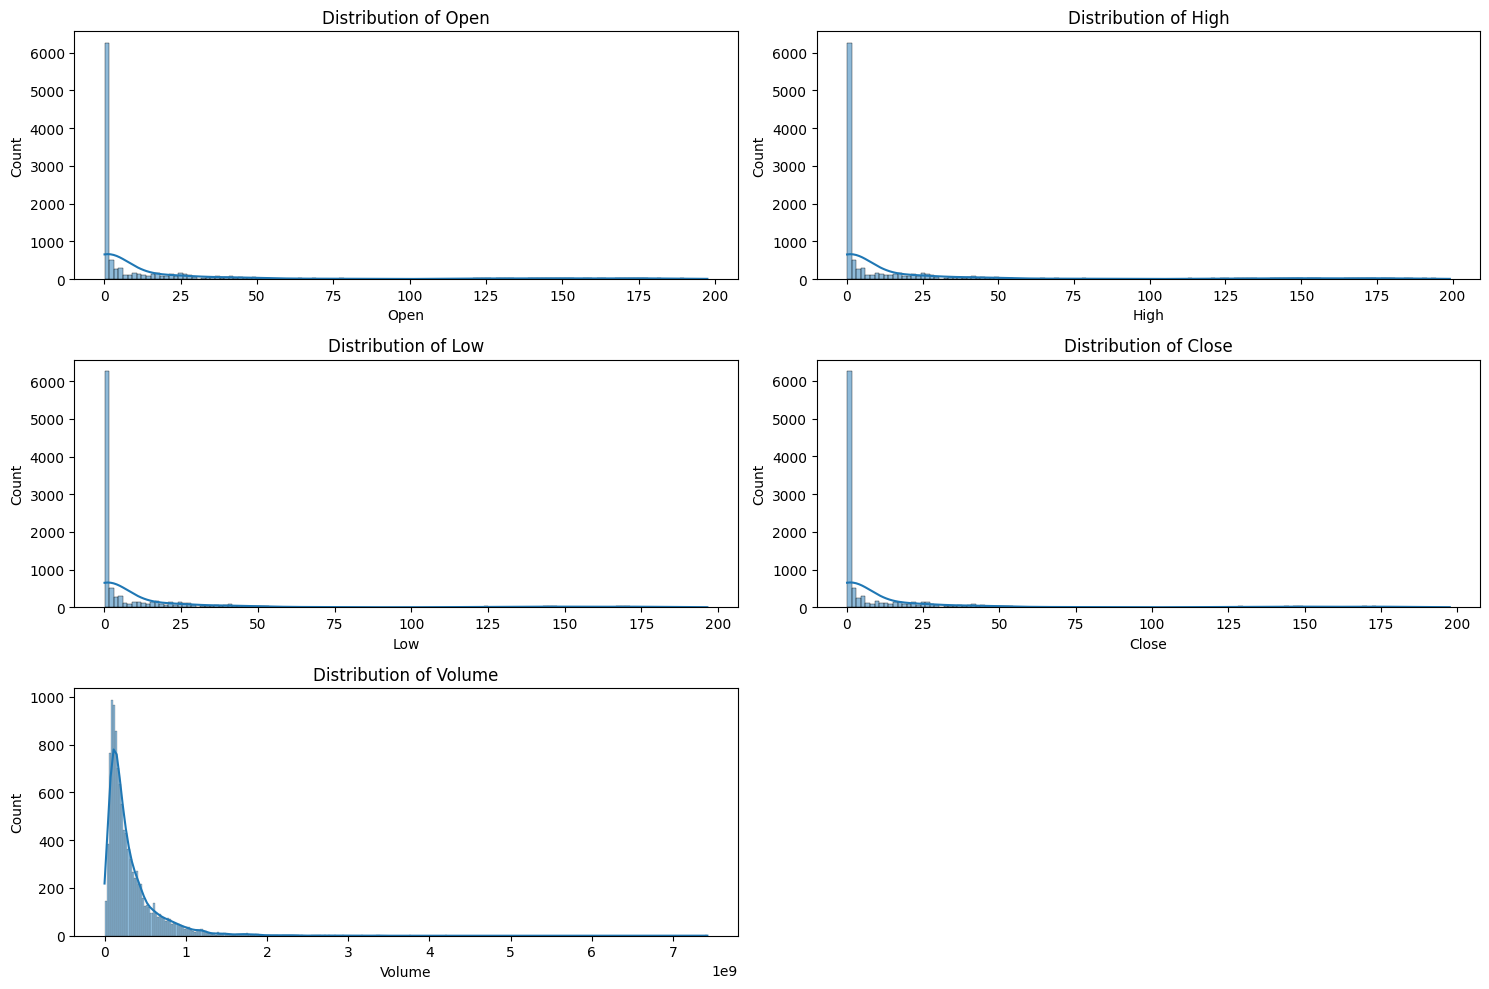

In [85]:
# Plot distributions
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Open', 'High', 'Low', 'Close', 'Volume']):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

#remove Dividends column and Stock splits as the show very weak significance to the problem, their correlation to the target variable is very low.

In [87]:
# Select the relevant columns
data = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)
# Display the first few rows of the scaled dataframe
print(scaled_df.head())
# Display the statistics of the 'Close' column to verify normalization
close_stats = scaled_df['Close'].describe()
print(close_stats)
# Check if the minimum value is 0 and the maximum value is 1
print(f"Min value: {scaled_df['Close'].min()}")
print(f"Max value: {scaled_df['Close'].max()}")

# Split the data into training, validation, and test sets
train_size = int(len(scaled_df) * 0.7)
val_size = int(len(scaled_df) * 0.15)
train_data = scaled_df[:train_size]
val_data = scaled_df[train_size:train_size + val_size]
test_data = scaled_df[train_size + val_size:]

# Display the shapes of the datasets
print(f"Training data shape: {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Test data shape: {test_data.shape}")

                               Open      High       Low     Close    Volume
Date                                                                       
1980-12-12 00:00:00-05:00  0.000308  0.000307  0.000311  0.000310  0.063198
1980-12-15 00:00:00-05:00  0.000284  0.000281  0.000285  0.000283  0.023699
1980-12-16 00:00:00-05:00  0.000249  0.000247  0.000250  0.000249  0.014246
1980-12-17 00:00:00-05:00  0.000257  0.000257  0.000261  0.000259  0.011647
1980-12-18 00:00:00-05:00  0.000270  0.000270  0.000274  0.000273  0.009897
count    10950.000000
mean         0.104518
std          0.222362
min          0.000000
25%          0.001031
50%          0.001969
75%          0.085925
max          1.000000
Name: Close, dtype: float64
Min value: 0.0
Max value: 1.0
Training data shape: (7664, 5)
Validation data shape: (1642, 5)
Test data shape: (1644, 5)


In [88]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length][3]  # Target is the 'Close' price
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 60
X_train, y_train = create_sequences(train_data.values, seq_length)
X_val, y_val = create_sequences(val_data.values, seq_length)
X_test, y_test = create_sequences(test_data.values, seq_length)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, {y_val.shape}")
print(f"Test data shape: {X_test.shape}, {y_test.shape}")



Training data shape: (7604, 60, 5), (7604,)
Validation data shape: (1582, 60, 5), (1582,)
Test data shape: (1584, 60, 5), (1584,)


In [89]:
import keras

# Define the LSTM model
model = keras.Sequential()
model.add(keras.layers.LSTM(units=50, return_sequences=True, input_shape=(seq_length, 5)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=False))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Save the model
model.save('apple_stock_lstm_model.keras')


Epoch 1/20
238/238 [==============================] - 28s 91ms/step - loss: 8.9860e-06 - val_loss: 3.6497e-05
Epoch 2/20
238/238 [==============================] - 21s 88ms/step - loss: 2.8663e-06 - val_loss: 3.0668e-05
Epoch 3/20
238/238 [==============================] - 21s 86ms/step - loss: 2.1459e-06 - val_loss: 2.4324e-05
Epoch 4/20
238/238 [==============================] - 22s 91ms/step - loss: 2.2784e-06 - val_loss: 1.5791e-05
Epoch 5/20
238/238 [==============================] - 21s 87ms/step - loss: 1.6553e-06 - val_loss: 2.5735e-05
Epoch 6/20
238/238 [==============================] - 21s 89ms/step - loss: 1.6584e-06 - val_loss: 1.7042e-05
Epoch 7/20
238/238 [==============================] - 20s 84ms/step - loss: 1.6637e-06 - val_loss: 1.6322e-05
Epoch 8/20
238/238 [==============================] - 22s 91ms/step - loss: 1.7877e-06 - val_loss: 3.5305e-05
Epoch 9/20
238/238 [==============================] - 20s 86ms/step - loss: 1.5435e-06 - val_loss: 1.0648e-04
Epoch 10/2

50/50 [==============================] - 2s 23ms/step
Mean Squared Error on Test Set: 5.1594969664364717e+17


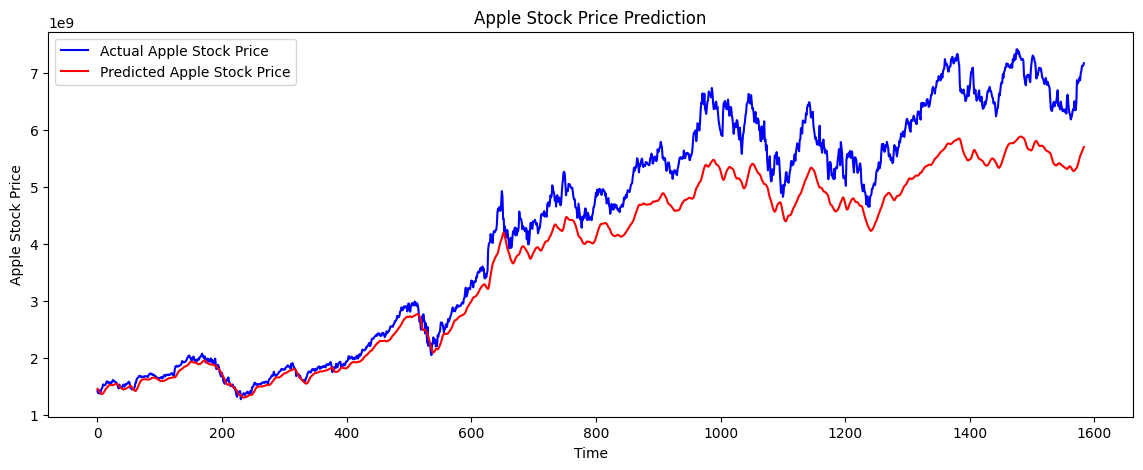

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Load the trained model
from keras.models import load_model
model = load_model('apple_stock_lstm_model.keras')

# Make predictions on the test set
predicted_prices = model.predict(X_test)

# Inverse transform the predictions and the actual values to their original scale
predicted_prices = scaler.inverse_transform(np.concatenate([np.zeros((predicted_prices.shape[0], 4)), predicted_prices], axis=1))[:, -1]
actual_prices = scaler.inverse_transform(np.concatenate([np.zeros((y_test.shape[0], 4)), y_test.reshape(-1, 1)], axis=1))[:, -1]

# Calculate the mean squared error
mse = mean_squared_error(actual_prices, predicted_prices)
print(f"Mean Squared Error on Test Set: {mse}")

# Plot the predicted vs actual prices
plt.figure(figsize=(14, 5))
plt.plot(actual_prices, color='blue', label='Actual Apple Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()


Training data shape: (7632, 32, 5), (7632,)
Validation data shape: (1610, 32, 5), (1610,)
Test data shape: (1612, 32, 5), (1612,)
Epoch 1/20
239/239 [==============================] - 23s 78ms/step - loss: 1.4313e-05 - val_loss: 3.7164e-05
Epoch 2/20
239/239 [==============================] - 20s 83ms/step - loss: 1.2245e-06 - val_loss: 3.0212e-05
Epoch 3/20
239/239 [==============================] - 18s 77ms/step - loss: 1.1915e-06 - val_loss: 1.2326e-05
Epoch 4/20
239/239 [==============================] - 18s 75ms/step - loss: 1.1982e-06 - val_loss: 2.2527e-05
Epoch 5/20
239/239 [==============================] - 20s 83ms/step - loss: 1.2110e-06 - val_loss: 1.0510e-05
Epoch 6/20
239/239 [==============================] - 18s 75ms/step - loss: 1.0822e-06 - val_loss: 1.0048e-05
Epoch 7/20
239/239 [==============================] - 18s 77ms/step - loss: 8.5096e-07 - val_loss: 4.0873e-05
Epoch 8/20
239/239 [==============================] - 20s 84ms/step - loss: 1.0747e-06 - val_loss: 2

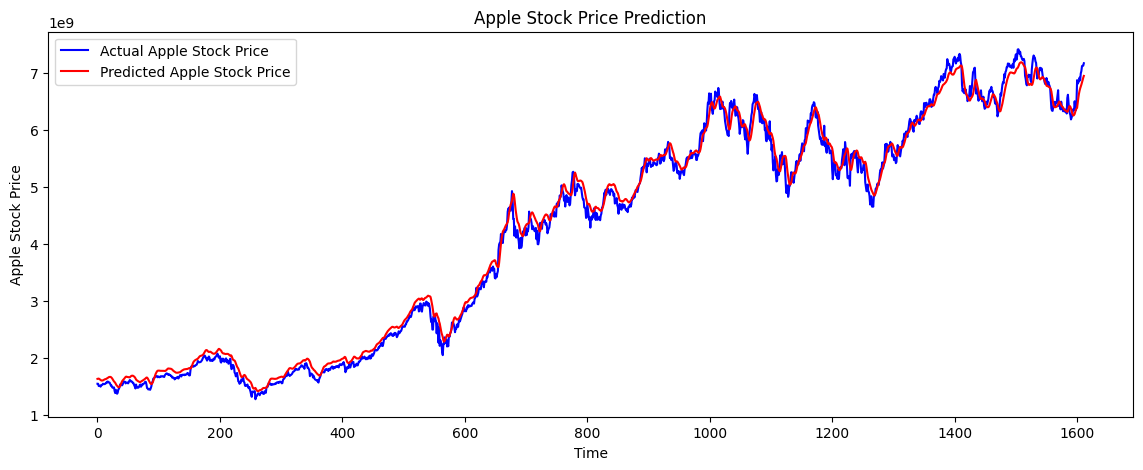

In [92]:
#increase number of LSTMs
import keras
from keras.models import load_model

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length][3]  # Target is the 'Close' price
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 32
X_train, y_train = create_sequences(train_data.values, seq_length)
X_val, y_val = create_sequences(val_data.values, seq_length)
X_test, y_test = create_sequences(test_data.values, seq_length)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, {y_val.shape}")
print(f"Test data shape: {X_test.shape}, {y_test.shape}")

# Define the LSTM model
model = keras.Sequential()
model.add(keras.layers.LSTM(units=128, return_sequences=True, input_shape=(seq_length, 5)))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.LSTM(units=50, return_sequences=False))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Save the model
model.save('apple_stock_lstm_modelimprov.keras')

#----------------------------------
# Load the trained model
model = load_model('apple_stock_lstm_modelimprov.keras')

# Make predictions on the test set
predicted_prices = model.predict(X_test)

# Inverse transform the predictions and the actual values to their original scale
predicted_prices = scaler.inverse_transform(np.concatenate([np.zeros((predicted_prices.shape[0], 4)), predicted_prices], axis=1))[:, -1]
actual_prices = scaler.inverse_transform(np.concatenate([np.zeros((y_test.shape[0], 4)), y_test.reshape(-1, 1)], axis=1))[:, -1]

# Calculate the mean squared error
mse = mean_squared_error(actual_prices, predicted_prices)
print(f"Mean Squared Error on Test Set: {mse}")

# Plot the predicted vs actual prices
plt.figure(figsize=(14, 5))
plt.plot(actual_prices, color='blue', label='Actual Apple Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [95]:
#other error metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(actual_prices, predicted_prices)

# Print evaluation metrics
print(f"Mean Squared Error on Test Set: {mse}")
print(f"R-squared on Test Set: {r2}")
print(f"Mean Absolute Error on Test Set: {mae}")
print(f"Root Mean Squared Error on Test Set: {rmse}")
print(f"Mean Absolute Percentage Error on Test Set: {mape}%")

Mean Squared Error on Test Set: 2.320521520590863e+16
R-squared on Test Set: 0.9940526375204036
Mean Absolute Error on Test Set: 123164954.46913283
Root Mean Squared Error on Test Set: 152332580.90739694
Mean Absolute Percentage Error on Test Set: 3.612999898563217%


attempt with data cut off point

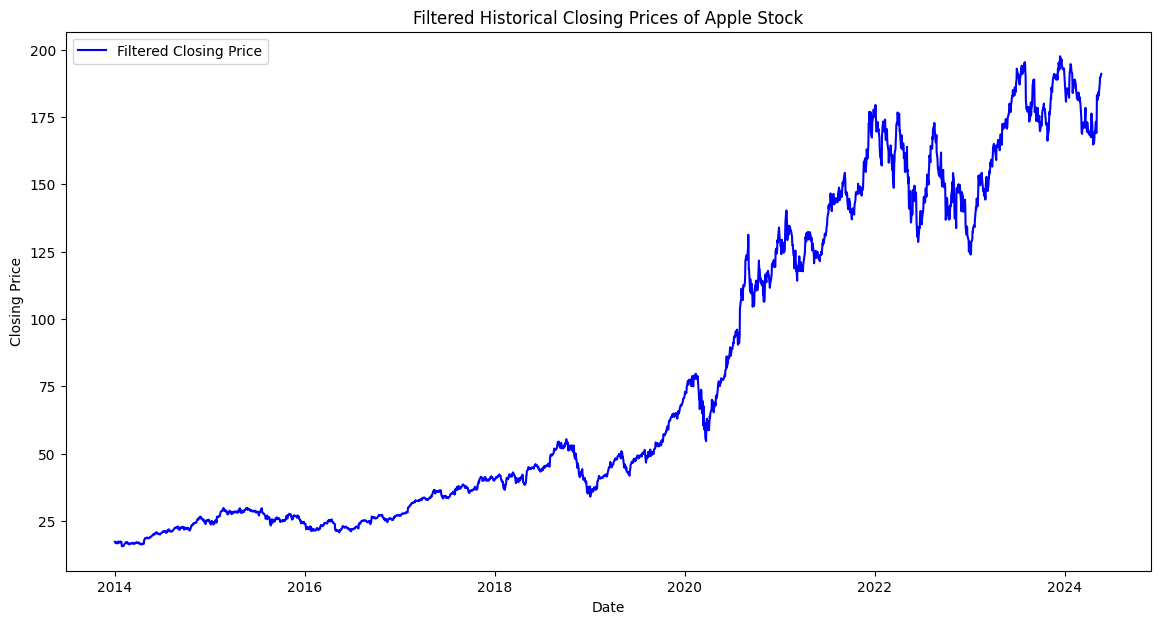

                               Open      High       Low     Close    Volume
Date                                                                       
2014-01-02 05:00:00+00:00  0.010379  0.009448  0.010084  0.009155  0.202248
2014-01-03 05:00:00+00:00  0.009895  0.008882  0.008085  0.007070  0.353748
2014-01-06 05:00:00+00:00  0.007251  0.007707  0.006907  0.007576  0.373089
2014-01-07 05:00:00+00:00  0.008430  0.007564  0.007652  0.006909  0.281486
2014-01-08 05:00:00+00:00  0.007485  0.007496  0.007785  0.007495  0.225143
Training data shape: (1829, 5)
Validation data shape: (391, 5)
Test data shape: (393, 5)


In [96]:
import pandas as pd
from datetime import datetime

# Load the CSV file into a DataFrame
df = pd.read_csv('apple_stock_data.csv')

# Convert the 'Date' column to datetime format with UTC conversion
df['Date'] = pd.to_datetime(df['Date'], utc=True)

# Filter the DataFrame to include only rows with dates from 2004 onwards
filtered_df = df[df['Date'] >= pd.Timestamp('2014-01-01', tz='UTC')]
# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv('filtered_output.csv', index=False)

# Set the 'Date' column as the index of the filtered DataFrame
filtered_df = filtered_df.set_index('Date')

# Plot the filtered closing prices to verify the cutoff
plt.figure(figsize=(14, 7))
plt.plot(filtered_df['Close'], color='blue', label='Filtered Closing Price')
plt.title('Filtered Historical Closing Prices of Apple Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


# Select the relevant columns
data = filtered_df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)
# Display the first few rows of the scaled dataframe
print(scaled_df.head())

# Split the data into training, validation, and test sets
train_size = int(len(scaled_df) * 0.7)
val_size = int(len(scaled_df) * 0.15)
train_data = scaled_df[:train_size]
val_data = scaled_df[train_size:train_size + val_size]
test_data = scaled_df[train_size + val_size:]

# Display the shapes of the datasets
print(f"Training data shape: {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Test data shape: {test_data.shape}")




In [97]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from keras import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.optimizers import Adam
from keras_tuner import RandomSearch

# Load and preprocess data
df = pd.read_csv('apple_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'], utc=True)
filtered_df = df[df['Date'] >= pd.Timestamp('2014-01-01', tz='UTC')]
filtered_df.to_csv('filtered_output.csv', index=False)
filtered_df = filtered_df.set_index('Date')

# Plot the filtered closing prices to verify the cutoff
plt.figure(figsize=(14, 7))
plt.plot(filtered_df['Close'], color='blue', label='Filtered Closing Price')
plt.title('Filtered Historical Closing Prices of Apple Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Select relevant columns and normalize data
data = filtered_df[['Open', 'High', 'Low', 'Close', 'Volume']]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

# Split data into training, validation, and test sets
train_size = int(len(scaled_df) * 0.7)
val_size = int(len(scaled_df) * 0.15)
train_data = scaled_df[:train_size]
val_data = scaled_df[train_size:train_size + val_size]
test_data = scaled_df[train_size + val_size:]

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length][3]  # Target is the 'Close' price
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Define hyperparameter tuning function
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32), return_sequences=True, input_shape=(seq_length, 5)))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32), return_sequences=False))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')), loss='mean_squared_error')
    return model

seq_length = 32
X_train, y_train = create_sequences(train_data.values, seq_length)
X_val, y_val = create_sequences(val_data.values, seq_length)
X_test, y_test = create_sequences(test_data.values, seq_length)

# Hyperparameter tuning
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=3,
    directory='hyperparameter_tuning',
    project_name='stock_price_prediction'
)

tuner.search(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

# Train the final model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Save the model
model.save('apple_stock_lstm_model.keras')

# Load the trained model
model = load_model('apple_stock_lstm_model.keras')

# Make predictions on the test set
predicted_prices = model.predict(X_test)

# Inverse transform the predictions and the actual values to their original scale
predicted_prices = scaler.inverse_transform(np.concatenate([np.zeros((predicted_prices.shape[0], 4)), predicted_prices], axis=1))[:, -1]
actual_prices = scaler.inverse_transform(np.concatenate([np.zeros((y_test.shape[0], 4)), y_test.reshape(-1, 1)], axis=1))[:, -1]

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', label='Predicted Prices')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'keras_tuner'

In [ ]:
#finalised model using parameters generated
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from keras import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Load and preprocess data
df = pd.read_csv('apple_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'], utc=True)
filtered_df = df[df['Date'] >= pd.Timestamp('2014-01-01', tz='UTC')]
filtered_df.to_csv('filtered_output.csv', index=False)
filtered_df = filtered_df.set_index('Date')

# Plot the filtered closing prices to verify the cutoff
plt.figure(figsize=(14, 7))
plt.plot(filtered_df['Close'], color='blue', label='Filtered Closing Price')
plt.title('Filtered Historical Closing Prices of Apple Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Select relevant columns and normalize data
data = filtered_df[['Open', 'High', 'Low', 'Close', 'Volume']]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

# Split data into training, validation, and test sets
train_size = int(len(scaled_df) * 0.7)
val_size = int(len(scaled_df) * 0.15)
train_data = scaled_df[:train_size]
val_data = scaled_df[train_size:train_size + val_size]
test_data = scaled_df[train_size + val_size:]

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length][3]  # Target is the 'Close' price
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 32
X_train, y_train = create_sequences(train_data.values, seq_length)
X_val, y_val = create_sequences(val_data.values, seq_length)
X_test, y_test = create_sequences(test_data.values, seq_length)

# Define the LSTM model with the best hyperparameters
units = 128
dropout_rate = 0.1
learning_rate = 0.0006255784808783383

model = Sequential()
model.add(LSTM(units=units, return_sequences=True, input_shape=(seq_length, 5)))
model.add(Dropout(dropout_rate))
model.add(LSTM(units=units, return_sequences=False))
model.add(Dropout(dropout_rate))
model.add(Dense(units=1))

# Compile the model with the specified learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Save the model
model.save('apple_stock_lstm_model_best_params.keras')

# Load the trained model
model = load_model('apple_stock_lstm_model_best_params.keras')

# Make predictions on the test set
predicted_prices = model.predict(X_test)

# Inverse transform the predictions and the actual values to their original scale
predicted_prices = scaler.inverse_transform(np.concatenate([np.zeros((predicted_prices.shape[0], 4)), predicted_prices], axis=1))[:, -1]
actual_prices = scaler.inverse_transform(np.concatenate([np.zeros((y_test.shape[0], 4)), y_test.reshape(-1, 1)], axis=1))[:, -1]

# Print the parameters used
print(f"Units: {units}, Dropout Rate: {dropout_rate}, Learning Rate: {learning_rate}")

# Calculate the mean squared error
mse = mean_squared_error(actual_prices, predicted_prices)

# Print a few predicted and actual values to check if they seem reasonable
print(f"Predicted prices (first 10): {predicted_prices[:10]}")
print(f"Actual prices (first 10): {actual_prices[:10]}")
print(f"Mean Squared Error: {mse}")

# Plot the results including the parameters used
plt.figure(figsize=(14, 7))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', label='Predicted Prices')
plt.title(f'Apple Stock Price Prediction\nUnits: {units}, Dropout Rate: {dropout_rate}, Learning Rate: {learning_rate}')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

print(f"Mean Squared Error: {mse}")

#other error metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(actual_prices, predicted_prices)

# Print evaluation metrics
print(f"Mean Squared Error on Test Set: {mse}")
print(f"R-squared on Test Set: {r2}")
print(f"Mean Absolute Error on Test Set: {mae}")
print(f"Root Mean Squared Error on Test Set: {rmse}")
print(f"Mean Absolute Percentage Error on Test Set: {mape}%")